# M2177.003100 Deep Learning <br> Assignment #2 Part 2: Training Convolutional Neural Networks

Copyright (C) Data Science & AI Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. 

Now, you're going to leave behind your implementations and instead migrate to one of popular deep learning frameworks, **TensorFlow**. <br>
In this notebook, you will learn how to train convolutional neural networks (CNNs) for classifying images in the CIFAR-10 dataset. <br>
There are **3 sections**, and in each section, you need to follow the instructions to complete the skeleton codes and explain them.

1. [Training a simple CNN model](#1) ( 10 points )
2. [Training a CNN model with Inception modules](#2) ( 10 points )
3. [Design a better model on CIFAR-10](#3) ( 20 points )  

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all three parts**, run the *CollectSubmission.sh* script with your **Team number** as input argument. <br>
This will produce a compressed file called *team_#.tar.gz*. Please submit this file on ETL. &nbsp;&nbsp; (Usage example: ./*CollectSubmission.sh* &nbsp; team_77)

### Some helpful tutorials and references for assignment #2:
- [1] TensorFlow official tutorials. [[link]](https://www.tensorflow.org/get_started/get_started)
- [2] Stanford CS231n lectures. [[link]](http://cs231n.stanford.edu/)
- [3] Iandola et al, "SqueezeNet: AlexNet-level accuracy with 50x fewer parameters and < 0.5MB model size", arXiv 2016. [[pdf]](https://arxiv.org/pdf/1602.07360.pdf)
- [4] Simonyan et al., "Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps", ICLR Workshop 2014. [[pdf]](https://arxiv.org/pdf/1312.6034.pdf)
- [5] Szegedy et al., "Intriguing properties of neural networks", ICLR 2014. [[pdf]](https://arxiv.org/pdf/1312.6199.pdf)
- [6] Szegedy et al., "Going deeper with convolutions", CVPR 2015. [[pdf]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf)
- [7] Yosinski et al., "Understanding Neural Networks Through Deep Visualization", ICML Workshop 2015. [[pdf]](http://yosinski.com/media/papers/Yosinski__2015__ICML_DL__Understanding_Neural_Networks_Through_Deep_Visualization__.pdf)

## Load datasets
The CIFAR-10 dataset will be downloaded automatically if it is not located in the *Utils* directory. <br>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from Utils.data_utils import load_CIFAR10, plot_images
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
    
conf = tf.ConfigProto()
conf.gpu_options.per_process_gpu_memory_fraction = 0.2
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Data has already been downloaded and unpacked.
Train data shape (40000, 32, 32, 3)
Train labels shape (40000,)
Validation data shape (10000, 32, 32, 3)
Validataion labels shape (10000,)
Test data shape (10000, 32, 32, 3)
Test labels shape (10000,)


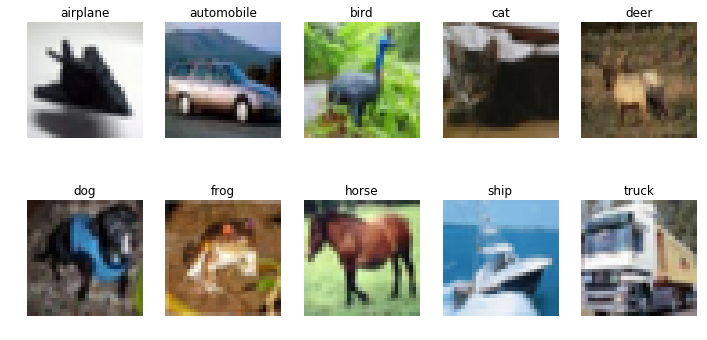

In [2]:
X_train, Y_train, X_val, Y_val, X_test, Y_test, Class_names = load_CIFAR10()
print('Train data shape ' + str(X_train.shape))
print('Train labels shape ' + str(Y_train.shape))
print('Validation data shape ' + str(X_val.shape))
print('Validataion labels shape ' + str(Y_val.shape))
print('Test data shape ' + str(X_test.shape))
print('Test labels shape ' + str(Y_test.shape))
plot_images(X_train, Y_train, Class_names, Each_Category=True)

## <a name="1"></a> 1. Training a basic CNN model ( 10 points )

In this section, you will learn how to define a simple CNN model architecture, train the model, and evaluate its performance on the validation dataset. The goal here isn't to get good performance (that'll be next), but instead to get comfortable with understanding the TensorFlow and configuring a CNN model.

Using the code provided as guidance, **(1) define**, **(2) train**, and **(3) evaluate** a model with the following architecture and training setup:

#### CNN architecture:
* 9x9 Convolutional layer with 8 filters, strides of 1, and ReLU activation
* 3x3 Max pooling layer with strides of 3
* Fully connected layer with 8 output units and ReLU activation
* Fully connected layer with 10 output units and linear activation
* You can use any padding option.

#### Training setup:
* Loss function: Sotfmax cross entropy
* Optimizer: Gradient descent with 0.01 learning rate
* Batch size: 500
* Training epoch: 1

In [3]:
# Define our model as a class
# It includes our model architecture, loss function, optimizer, and evaluation metrics
class simple_model(object):
    def __init__(self):
        ##############################################################################
        #                          IMPLEMENT YOUR CODE                               #
        ##############################################################################
        pass
        #Initialize variable of Input (Height(input_h), Width(input_w), Filter(input_f), # of Label(num_label)
        #If other images except CIFAR-10, we have to change these variables.
        self.input_h = 32
        self.input_w = 32
        self.input_f = 3
        self.num_label = 10
        
        #Initialize input with placeholder of tensorflow with float32. (Order should be width first.)
        self.inputs = tf.placeholder(tf.float32, [None, self.input_w, self.input_h, self.input_f])
        #Initialize target with placeholder of tensorflow with int64
        self.targets = tf.placeholder(tf.int64, [None])
        #Initialize is_training as boolean because the parameter(is_training) in run_model shows False.
        self.is_training = tf.placeholder(tf.bool)
        
        #Create CNN Architecture as shown above in description.
        #First 9x9 convolutional layer with 8 filters, strides of 1, and ReLU activation function
        #Used conv2d in tensorflow library and referenced from https://www.tensorflow.org/api_docs/python/tf/layers/conv2d
        conv_layer = tf.layers.conv2d(inputs = self.inputs, filters = 8, kernel_size = [9, 9], strides = (1, 1), padding = "same", activation = tf.nn.relu)
        print("conv_layer shape ", conv_layer.get_shape())
        #Second, 3x3 max pooling layer with strides of 3
        #Used max_pooling2d in tensorflow library and referenced from https://www.tensorflow.org/api_docs/python/tf/layers/max_pooling2d
        maxPool_layer = tf.layers.max_pooling2d(inputs = conv_layer, pool_size = [3, 3], padding = "same", strides = 3)
        print("maxPool_layer shape ", maxPool_layer.get_shape())
        #Third, dropout the max pooling layer
        #Referenced from tensorflow API (https://www.tensorflow.org/api_docs/python/tf/layers/dropout)
        drop_out = tf.layers.dropout(inputs=maxPool_layer, rate = 0.3, training = self.is_training)
        print("drop_out shape ", drop_out.get_shape())
        #Fourth, FC layer with 8 output units and ReLU activation
        dense = tf.layers.dense(inputs = drop_out, units = 8, activation = tf.nn.relu)
        print("FC1 shape ", dense.get_shape())
        #One more drop out(?)
        drop_out1 = tf.layers.dropout(inputs = dense, rate = 0.3, training = self.is_training)
        print("drop_out1 ", drop_out1.get_shape())
        
        #Fifth, FC layer with 10 output units and linear activation, This layer might be output layer.
        #Had error without reshaping, so added reshape.
        reshaping = tf.reshape(drop_out1, [-1, 8 * 11 * 11])
        self.outputs = tf.layers.dense(inputs = reshaping, units = 10)
        print("outputs shape ", self.outputs.get_shape())      

        #Training setup
        #Defines loss
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = self.outputs, labels = tf.one_hot(self.targets, 10)))

        #Defines optimizer with learning rate = 0.01
        self.optimizer = tf.train.AdamOptimizer(0.01).minimize(self.cost)

        #Defines accuracy
        #Correction: compares targets and outputs by using tf.equal.
        #Referenced from https://www.tensorflow.org/api_docs/python/tf/math/equal
        self.correction = tf.equal(self.targets, tf.argmax(self.outputs, 1))
        #To get accuracy, need to change type of tensor from int64 to float32
        self.accuracy = tf.reduce_mean(tf.cast(self.correction, tf.float32))

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

# Create a function to train and evaluata a model
# You can reuse this function throughout the assignment
def run_model(session, model, X, Y, epochs=1, batch_size=500, is_training=False):
    # For training the model
    if is_training:
        ##############################################################################
        #                          IMPLEMENT YOUR CODE                               #
        ##############################################################################
        pass
        for epoch in range(epochs):
            #For iterating, initialize size of iteration. 
            num_iteration = int(X.shape[0] / batch_size)
            for i in range(num_iteration):
                j = i + 1
                #defines training data and label with batch
                train_data = X[i * batch_size: j * batch_size]
                train_label = Y[i * batch_size: j * batch_size]
                #Now get loss from it
                optimizer, loss = sess.run([model.optimizer, model.cost], feed_dict = {model.inputs: train_data, model.targets: train_label, model.is_training: is_training})
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
        print("Training done!")

    # Evaluate loss and accuracy of the model
    else:
        ##############################################################################
        #                          IMPLEMENT YOUR CODE                               #
        ##############################################################################
        pass
        num_iteration_test = int(X.shape[0] / batch_size)
        loss, accuracy = float(0), float(0)
        for k in range(num_iteration_test):
            l = k + 1
            test_data = X[k * batch_size: l * batch_size]
            test_label = Y[k * batch_size: l * batch_size]
            test_accuracy, test_cost = sess.run([model.accuracy, model.cost], feed_dict = {model.inputs: test_data, model.targets: test_label, model.is_training: is_training})
            
            accuracy += test_accuracy
            loss += test_cost / batch_size
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
        return (loss / X.shape[0] * batch_size, accuracy / X.shape[0] * batch_size)

# Clear old variables
tf.reset_default_graph()    

# Declare out simple model
model = simple_model()    
    
# Now, train and evaluate the model
with tf.Session(config=conf) as sess:
    ##############################################################################
    #                          IMPLEMENT YOUR CODE                               #
    ##############################################################################
    pass
    sess.run(tf.global_variables_initializer())
    run_model(sess, model, X_train, Y_train, epochs = 1, is_training = True)
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    print("(Loss, Accuracy) on Training Dataset (%.4f, %.2f)" % run_model(sess, model, X_train, Y_train))
    print("(Loss, Accuracy) on Validataion Dataset (%.4f, %.2f)" % run_model(sess, model, X_val, Y_val))

conv_layer shape  (?, 32, 32, 8)
maxPool_layer shape  (?, 11, 11, 8)
drop_out shape  (?, 11, 11, 8)
FC1 shape  (?, 11, 11, 8)
drop_out1  (?, 11, 11, 8)
outputs shape  (?, 10)
Training done!
(Loss, Accuracy) on Training Dataset (0.0032, 0.45)
(Loss, Accuracy) on Validataion Dataset (0.0032, 0.44)


## <a name="2"></a>2. Training a CNN model with Inception module ( 10 points )

In this section, you will implement a little more complex CNN model with an `Inception module` [6]. <br>

![Inception_module](Utils/InceptionModule_GoogLeNet.png)

Using the code provided as guidance, <br>
**(1)** Define an `inception module`, which is the building block of **Inception model (a.k.a GoogLeNet)**, the winner of ILSVRC14. <br>
**(2)** Define, train, and evaluate a CNN model with the following architecture and training setup:

#### CNN architecture:
* `Inception module` with 
    * 8 filters for the main convolutions (blue blocks in the Figure(a))
    * 2 filters for the dimensionality reduction convolutions (yellow blocks in the Figure(a))
    *  ReLU activation
* Fully connected layer with 10 output units and linear activation
* Choose the proper padding option on your own.

#### Training setup:
* Loss function: Sotfmax cross entropy
* Optimizer: Gradient descent with 0.01 learning rate
* Batch size: 500
* Training epoch: 5

In [4]:
def Inception_module(Input, C1, C3_R, C3, C5_R, C5, P3_R):
    '''
    C1, C3, C5: number of filters for the main convolutions
    C3_R, C5_R, P3_R: number of filters for the dimensionality reduction convolutions
    '''
    ##############################################################################
    #                          IMPLEMENT YOUR CODE                               #
    ##############################################################################
    pass
    #From figure (a) Inception module, we have total 7 layers, so we need to make 7 layers and Filter concatenation.
    #For more information, we took the reference from https://norman3.github.io/papers/docs/google_inception.html
    #First, C1 (Blue block with 8 filters) which is located at left side in the figure with input.
    #We will use the tf.layers.conv2d() as we used in problem 1.
    conv_layerC1 = tf.layers.conv2d(inputs = Input, filters = C1, kernel_size = [1, 1], strides = (1, 1), padding = "same", activation = tf.nn.relu)
    
    #Second, C3_R which is the dimensionality reduction convolution of 3 x 3 conv layer(Blue block) with yellow color (1 x 1). 
    conv_layerC3_R = tf.layers.conv2d(inputs = Input, filters = C3_R, kernel_size = [1, 1], strides = (1, 1), padding = "same", activation = tf.nn.relu)
    
    #Third, C5_R which is the dimensionality reduction convolution of 5 x 5 conv layer(Blue block) with yellow color (1 x 1).
    conv_layerC5_R = tf.layers.conv2d(inputs = Input, filters = C5_R, kernel_size = [1, 1], strides = (1, 1), padding = "same", activation = tf.nn.relu)
    
    #Fourth, max pooling layer (3x3 Red block) with Input
    maxPool_layer = tf.layers.max_pooling2d(inputs = Input, pool_size = [3, 3], padding = "same", strides = 1)
    
    #Fifth, 3 x 3 conv layer (Blue block) and the input will be conv_layerC3_R
    conv_layerC3 = tf.layers.conv2d(inputs = conv_layerC3_R, filters = C3, kernel_size = [3, 3], strides = (1, 1), padding = "same", activation = tf.nn.relu)
    
    #Sixth, 5 x 5 conv layer (Blue block) and the input will be conv_layerC5_R
    conv_layerC5 = tf.layers.conv2d(inputs = conv_layerC5_R, filters = C5, kernel_size = [5, 5], strides = (1, 1), padding = "same", activation = tf.nn.relu)
    
    #Seventh, 1 x 1 dimensionality reduction conv layer for max pooling layer, the input will be maxPool_layer
    conv_layerP3_R = tf.layers.conv2d(inputs = maxPool_layer, filters = P3_R, kernel_size = [1, 1], strides = (1, 1), padding = "same", activation = tf.nn.relu)
    
    #After initializing 7 layers, we need to do filter concatenation
    #with 4 layers which are conv_layerC1, conv_layerC3, conv_layerC5, and conv_layerP3_R
    #concats to the 4th dimension (index = 3)
    Inception = tf.concat([conv_layerC1, conv_layerC3, conv_layerC5, conv_layerP3_R], axis = 3)
    
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return Inception

class complex_model(object):
    def __init__(self):
        ##############################################################################
        #                          IMPLEMENT YOUR CODE                               #
        ##############################################################################
        pass 
        #As we defined in problem 1, defines input height, width, filter, # of label.
        #Initialize variable of Input (Height(input_h), Width(input_w), Filter(input_f), # of Label(num_label)
        #If other images except CIFAR-10, we have to change these variables.
        self.input_h = 32
        self.input_w = 32
        self.input_f = 3
        self.num_label = 10
        
        #Initialize input with placeholder of tensorflow with float32. (Order should be width first.)
        self.inputs = tf.placeholder(tf.float32, [None, self.input_w, self.input_h, self.input_f])
        #Initialize target with placeholder of tensorflow with int64
        self.targets = tf.placeholder(tf.int64, [None])
        #Initialize is_training as boolean because the parameter(is_training) in run_model shows False.
        self.is_training = tf.placeholder(tf.bool)
        
        #Defines inception variable(self.inception) with Inception_module function
        #From order of parameter, (Input, C1, C3_R, C3, C5_R, C5, P3_R)
        #C1, C3, C5 have 8 filters, and C3_R, C5_R, P3_R have 2 filters.
        self.inception = Inception_module(self.inputs, 8, 2, 8, 2, 8, 2)
        print ("shape of inception ", self.inception.get_shape)
        reshaping = tf.reshape(self.inception, [-1, 26 * 32 * 32])
        self.outputs = tf.layers.dense(inputs = reshaping, units = 10)
        
        #Copied the code from Problem 1 above
        #Training setup
        #Defines loss
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = self.outputs, labels = tf.one_hot(self.targets, 10)))

        #Defines optimizer with learning rate = 0.01
        #It says we need to use Gradient Descent method instead of Adam
        self.optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(self.cost)

        #Defines accuracy
        #Correction: compares targets and outputs by using tf.equal.
        #Referenced from https://www.tensorflow.org/api_docs/python/tf/math/equal
        self.correction = tf.equal(self.targets, tf.argmax(self.outputs, 1))
        #To get accuracy, need to change type of tensor from int64 to float32
        self.accuracy = tf.reduce_mean(tf.cast(self.correction, tf.float32))
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ############################################################################## 

# Clear old variables
tf.reset_default_graph()    

# Declare out simple model
model = complex_model()    
    
# Now, create a tf.Session and train the model
with tf.Session(config=conf) as sess:
    ##############################################################################
    #                          IMPLEMENT YOUR CODE                               #
    ##############################################################################
    pass
    sess.run(tf.global_variables_initializer())
    #With epochs 5, we use run_model to run.
    run_model(sess, model, X_train, Y_train, epochs = 5, is_training = True)
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    print("(Loss, Accuracy) on Training Dataset (%.4f, %.2f)" % run_model(sess, model, X_train, Y_train))
    print("(Loss, Accuracy) on Validataion Dataset (%.4f, %.2f)" % run_model(sess, model, X_val, Y_val))

shape of inception  <bound method Tensor.get_shape of <tf.Tensor 'concat:0' shape=(?, 32, 32, 26) dtype=float32>>
Training done!
(Loss, Accuracy) on Training Dataset (0.0030, 0.48)
(Loss, Accuracy) on Validataion Dataset (0.0031, 0.46)


## <a name="3"></a>3. Design a better model on CIFAR-10 ( 20 points )

Now it's your job to experiment with CNNs to train a model that achieves **<font color=red>>= 70% accuracy on the validation set</font>** of CIFAR-10. <br> You can reuse the implemented functions from above.

### Things you can try to change:
- Filter size
- Number of filters
- Pooling vs Strided Convolution
- Network architectures
- Optimizers
- Activation functions
- Regularizations
- Model ensembles
- Data augmentation

In [ ]:
class my_model(object):
    def __init__(self):
        ##############################################################################
        #                          IMPLEMENT YOUR CODE                               #
        ##############################################################################
        pass
        #As we defined in problem 1, defines input height, width, filter, # of label.
        #Initialize variable of Input (Height(input_h), Width(input_w), Filter(input_f), # of Label(num_label)
        #If other images except CIFAR-10, we have to change these variables.
        self.input_h = 32
        self.input_w = 32
        self.input_f = 3
        self.num_label = 10
        
        #Initialize input with placeholder of tensorflow with float32. (Order should be width first.)
        self.inputs = tf.placeholder(tf.float32, [None, self.input_w, self.input_h, self.input_f])
        #Initialize target with placeholder of tensorflow with int64
        self.targets = tf.placeholder(tf.int64, [None])
        #Initialize is_training as boolean because the parameter(is_training) in run_model shows False.
        self.is_training = tf.placeholder(tf.bool)
        
        #Defines inception variable(self.inception) with Inception_module function
        #From order of parameter, (Input, C1, C3_R, C3, C5_R, C5, P3_R)
        #C1, C3, C5 have 8 filters, and C3_R, C5_R, P3_R have 2 filters.
        #But now trying to increase filters with twice more
        self.inception1 = Inception_module(self.inputs, 64, 8, 64, 8, 64, 8)
        
        #And adding max pooling with drop_outs like problem 1.
        maxPooling_try1 = tf.layers.max_pooling2d(inputs = self.inception1, pool_size = [3, 3], strides = (2, 2), padding = "valid")
        drop_out_try1 = tf.layers.dropout(inputs = maxPooling_try1, rate = 0.5, training = self.is_training)
        
        #Second trial, additional inception module with same options
        self.inception2 = Inception_module(drop_out_try1, 64, 8, 64, 8, 64, 8)
        #And adding max pooling with drop_outs like problem 1.
        maxPooling_try2 = tf.layers.max_pooling2d(inputs = self.inception2, pool_size = [3, 3], strides = (2, 2), padding = "valid")
        drop_out_try2 = tf.layers.dropout(inputs = maxPooling_try2, rate = 0.5, training = self.is_training)
        print ("shape of drop_out_try2 ", drop_out_try2.get_shape)
        reshaping = tf.reshape(drop_out_try2, [-1, 200 * 7 * 7])
        self.outputs = tf.layers.dense(inputs = reshaping, units = 10)
        
        #Copied the code from Problem 1 above
        #Training setup
        #Defines loss
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = self.outputs, labels = tf.one_hot(self.targets, 10)))

        #Defines optimizer with learning rate = 0.01
        #Leave it as Adam
        self.optimizer = tf.train.AdamOptimizer(0.01).minimize(self.cost)

        #Defines accuracy
        #Correction: compares targets and outputs by using tf.equal.
        #Referenced from https://www.tensorflow.org/api_docs/python/tf/math/equal
        self.correction = tf.equal(self.targets, tf.argmax(self.outputs, 1))
        #To get accuracy, need to change type of tensor from int64 to float32
        self.accuracy = tf.reduce_mean(tf.cast(self.correction, tf.float32))
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

# Clear old variables
tf.reset_default_graph()    

# Declare out simple model
model = my_model()    
    
# Now, create a tf.Session and train the model
with tf.Session(config=conf) as sess:
    ##############################################################################
    #                          IMPLEMENT YOUR CODE                               #
    ##############################################################################
    pass
    sess.run(tf.global_variables_initializer())
    #With epochs 5, we use run_model to run.
    run_model(sess, model, X_train, Y_train, epochs = 10, batch_size = 100, is_training = True)
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    print("(Loss, Accuracy) on Training Dataset (%.4f, %.2f)" % run_model(sess, model, X_train, Y_train))
    print("(Loss, Accuracy) on Validataion Dataset (%.4f, %.2f)" % run_model(sess, model, X_val, Y_val))
    
    #Save your final model
    saver = tf.train.Saver()
    saver.save(sess, "./Utils/model_checkpoints/my_model_final")

shape of drop_out_try2  <bound method Tensor.get_shape of <tf.Tensor 'dropout_2/cond/Merge:0' shape=(?, 7, 7, 200) dtype=float32>>


### Describe what you did here
In this cell you should also write an explanation of what you did, any additional features that you implemented, and any visualizations or graphs that you make in the process of training and evaluating your network.

What we added:

First trial: Inception module with filters that are multiplied by 2, Additional max pooling layer with strides = [2, 2], padding = "valid", Additional drop out layer with rate = 0.3, Increased epochs to 5 and decreased batch_size to 100

Result for first trial: (Loss, Accuracy) on Training Dataset (0.0027, 0.53), (Loss, Accuracy) on Validataion Dataset (0.0029, 0.50)


Second trial: Two inception module with filters that are multiplied by 2, Another additional max pooling layer with strides = [3, 3], padding = "valid", Another additional drop out layer with rate 0.3, Increase epochs to 10 and decreased batch_size to 100.

Result for second trial: (Loss, Accuracy) on Training Dataset (0.0031, 0.43), (Loss, Accuracy) on Validataion Dataset (0.0032, 0.42)

### Test Set - Do this only once
Now that you've gotten a result that you're happy with, test your final model on the test set. This would be the score you would achieve on a competition. Think about how this compares to your validation set accuracy.

In [ ]:
# Clear old variables
tf.reset_default_graph()  

with tf.Session(config=conf) as sess:
    #Load your final model
    model = my_model()
    saver = tf.train.Saver()
    saver.restore(sess, "./Utils/model_checkpoints/my_model_final")
    print("(Loss, Accuracy) on Test Dataset (%.4f, %.2f)" % run_model(sess, model, X_test, Y_test))